# Convolutional Neural Networks for Image Classification

### Reading the required libraries

In [90]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
%matplotlib inline

### Setting the path of image directory

In [9]:
my_data_dir = 'D:cell_images\\cell_images\\'

In [11]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir)

['test', 'train']

In [12]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [13]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [14]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [16]:
os.listdir(train_path+"\\parasitized")[:5]

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png']

In [17]:
para_cell = train_path+"\\parasitized"+"\\C100P61ThinF_IMG_20150918_144104_cell_162.png"

In [19]:
para_img = imread(para_cell)

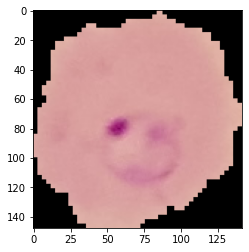

In [20]:
plt.imshow(para_img)

In [21]:
para_img.shape

(148, 142, 3)

In [26]:
uninfected_cell = train_path+"\\uninfected\\"+os.listdir(train_path+"\\uninfected")[0]

In [29]:
uninfected_img = imread(uninfected_cell)

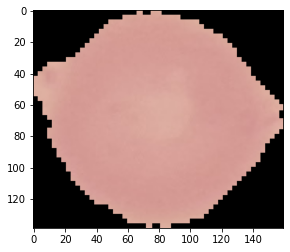

In [32]:
plt.imshow(uninfected_img)

In [33]:
# Checking the number of images

len(os.listdir(train_path+'\\parasitized'))

12480

In [35]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [36]:
len(os.listdir(test_path+'\\parasitized'))

1300

In [38]:
len(os.listdir(test_path+'\\uninfected'))

1300

### Let's find out the average dimensions of these images.

In [39]:
para_img.shape

(148, 142, 3)

In [40]:
uninfected_img.shape

(139, 160, 3)

In [41]:
dim1 = []
dim2 = []

for i in os.listdir(test_path+"\\uninfected"):
    
    img = imread(test_path+"\\uninfected"+"\\"+i)
    d1,d2,colour = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\Akshay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


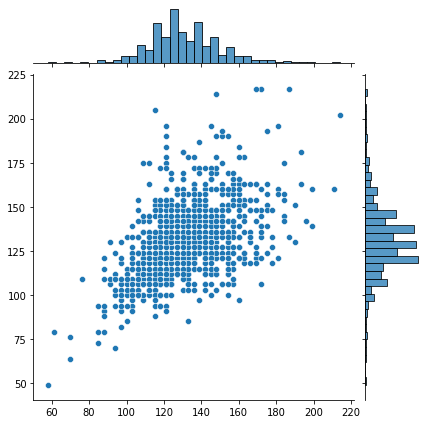

In [43]:
sns.jointplot(dim1,dim2)    # To check where the average image size falls   # can be observed that its falls somewhere around 130s for dim1 and dim2

In [44]:
np.mean(dim1)

130.92538461538462

In [45]:
np.mean(dim2)

130.75

In [46]:
# Setting the image size

image_size = (130,130,3)

# Preparing the Data for the model

In [47]:
# Generating some images so the model becomes more robust to different images that our data set doesn't have

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.10,
                              height_shift_range=0.10,
                              rescale=1/255,
                              shear_range=0.1,
                              zoom_range=0.10,
                              horizontal_flip=True,
                              fill_mode="nearest")

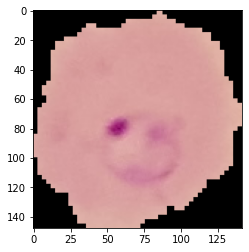

In [53]:
plt.imshow(para_img)

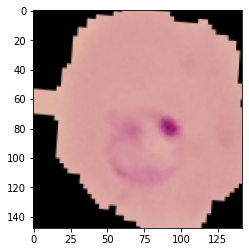

In [54]:
plt.imshow(image_gen.random_transform(para_img))

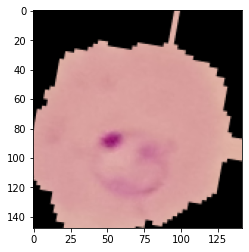

In [55]:
plt.imshow(image_gen.random_transform(para_img))    # random outputs for the generated images

In [56]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [57]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPool2D

In [63]:
model = Sequential()


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_size,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_size,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_size,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
__________

# Early Stopping

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
early_stop = EarlyStopping(monitor="val_loss",patience=2)

# Training the models

In [68]:
batch_size = 16

In [71]:
image_size[:2]

(130, 130)

In [72]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_size[:2],
                                               color_mode="rgb",
                                               batch_size=batch_size,
                                               class_mode="binary",shuffle=True)

Found 24958 images belonging to 2 classes.


In [73]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_size[:2],
                                               color_mode="rgb",
                                               batch_size=batch_size,
                                               class_mode="binary",shuffle=True)

Found 2600 images belonging to 2 classes.


In [91]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [92]:
results = model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 514s 329ms/step - loss: 0.2046 - acc: 0.9378 - val_loss: 0.1754 - val_acc: 0.9446
Epoch 2/20
1560/1560 [==============================] - 511s 328ms/step - loss: 0.1728 - acc: 0.9478 - val_loss: 0.1807 - val_acc: 0.9381
Epoch 3/20
1560/1560 [==============================] - 510s 327ms/step - loss: 0.1651 - acc: 0.9480 - val_loss: 0.1501 - val_acc: 0.9477
Epoch 4/20
1560/1560 [==============================] - 514s 329ms/step - loss: 0.1603 - acc: 0.9495 - val_loss: 0.1633 - val_acc: 0.9504
Epoch 5/20
1560/1560 [==============================] - 510s 327ms/step - loss: 0.1561 - acc: 0.9510 - val_loss: 0.1569 - val_acc: 0.9435


In [93]:
from tensorflow.keras.models import load_model

In [94]:
model.save("malaria_model.h5")

# Evaluating the model

In [95]:
model.history.history

{'loss': [0.20459120371649497,
  0.1727578241396876,
  0.16513855473551625,
  0.16033184594503913,
  0.15610477418245983],
 'acc': [0.93781555, 0.94783235, 0.94795257, 0.94951516, 0.9509576],
 'val_loss': [0.17535535273559255,
  0.18068467754230727,
  0.1500571146950217,
  0.16326655645174848,
  0.15691337720748105],
 'val_acc': [0.94461536, 0.9380769, 0.94769233, 0.9503846, 0.94346154]}

In [96]:
losses = pd.DataFrame(model.history.history)

In [97]:
losses

,loss,acc,val_loss,val_acc
0,0.204591,0.937816,0.175355,0.944615
1,0.172758,0.947832,0.180685,0.938077
2,0.165139,0.947953,0.150057,0.947692
3,0.160332,0.949515,0.163267,0.950385
4,0.156105,0.950958,0.156913,0.943462


<AxesSubplot:>

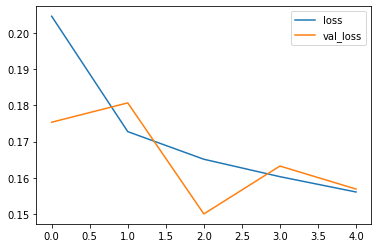

In [98]:
losses[["loss","val_loss"]].plot()

In [100]:
model.metrics_names

['loss', 'acc']

In [101]:
model.evaluate_generator(test_image_gen)   # accuracy is 94%

[0.15351105876769755, 0.94769233]

# Predicting a new image

In [123]:
from tensorflow.keras.preprocessing import image

In [118]:
para_cell

'D:\\udemy course (deep learning)\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\04-CNNs\\cell_images\\cell_images\\\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [119]:
my_image = image.load_img(para_cell,target_size=image_size)

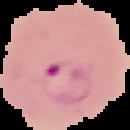

In [120]:
my_image

In [121]:
type(my_image)

PIL.Image.Image

In [125]:
my_image = image.img_to_array(my_image)

In [126]:
type(my_image)

numpy.ndarray

In [127]:
my_image.shape

(130, 130, 3)

In [128]:
my_image = np.expand_dims(my_image,axis=0)

In [129]:
my_image.shape

(1, 130, 130, 3)

In [130]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [131]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [132]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

#### cleary we can observe that the cellis parasitized